# Feature Engineering and Data Preparation - Download Data

--- 

## Description

In this Notebook we perform basic data cleansing and extract useful features for our analysis in subsequent Notebooks. Depending on the ML model additional pre-processing of the data is necessary. 

Based on existing features in the raw data, we use three general approaches: 
1. Extracting Information
2. Combining Information
3. Transforming Information

The goal of this Notebook is to generate more usesable data for ML model in subsequent Notebooks. 


## Requirements

Requirements for the Notebook environment can be found [here](https://github.com/luiul/statistics-meets-logistics/blob/main/requirements.txt). The Notebook has not been tested in other environments. 

## Architecture Model Described in ML Paper
<img src="./figures/architecture.png" width="600" alt="Architecture model for the client-based data rate prediction." class="center">


## Boosting VtC Communication by ML-enabled Context Prediction

Article propose a client-side opportunistic transmission scheme that applies machine learning-based data rate prediction for scheduling the transmission times of sensor data transmissions with respect to the expected resource-efficiency

The studies agree that passively measurable network quality indicators such as Reference Signal Received Power (RSRP), Reference Signal Received Quality (RSRQ), Signal- to-interference-plus-noise Ratio (SINR), and Channel Quality Indicator (CQI) provide meaningful information, which can be leveraged to estimate the resulting data rate based on machine learning methods even in challenging environments. In comparison to time series-based active data rate prediction (e.g., based on Kalman filters), passive approaches do not monitor the data rates of ongoing transmissions and can therefore be applied without introducing additional traffic themselves. As resource efficiency is one of the optimization goals of this work, we focus on passive data rate prediction.

In this context, the usage of connectivity maps for anticipatory communication allows to exploit a priori information about the channel quality based on previous measurements in the same geographical area. Radio Environment Maps (REMs) implement a similar concept, which enables opportunistic data transfer with Cognitive Radio (CR) methods. However, those purely spectrum-aware approaches do not consider the cross-layer interdependencies within the protocol stack. Moreover, as the resource allocation in LTE is performed by the scheduling mechanisms of the evolved NodeB (eNB), those methods have to be implemented by the mobile network operator. In contrast to that, the proposed machine learning-based approach can easily be implemented on the client side without requiring modifications to the network infrastructure.

The feature set of the data rate prediction is composed of the network quality indicators, the velocity and the payload size of the data packet. The resulting data rate of the active transmission is used as the label for the prediction process, which is performed with the models Artificial Neural Network (ANN), Linear Regression (LR), Random Forest (RF), M5 Decision Tree (M5T) and Support Vector Machine (SVM). Finally, the prediction performance of the different models is evaluated using 10-fold cross validation. Additionally, the measured channel context parameters and the position information of the vehicle are utilized to create a multi-layer connectivity map that stores the cell-wise average of each indicator from multiple visits of the same geographical area.

# Import Libraries and Set Options

---

## General Libraries

In [1]:
# Vector (Series) & Matrix (DateFrame) manipulation 
import numpy as np
import pandas as pd

In [2]:
# Data Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# If JaveScript is configured and enabled: 
# static images: 
# %matplotlib inline

# interactive images: 
# %matplotlib notebook

In [3]:
# Interactive Data Visualization
# import plotly.express as px

In [4]:
# Python Utilities
# Generate datetime objects from raw timestamps and vice versa
from datetime import datetime

# OS Interface
# import os

# Regex search patterns 
# import re

## Check Prerequisites

In [5]:
# calling np.version.version should return 1.18.1
# np.version.version

# calling pd.__version__ should return 1.1.2
# pd.__version__

## Set Options

In [6]:
# pd.set_option('display.max_columns',None)
# avoid truncate view of DataFrame (scroll to view all columns); set to 0 for pandas to auto-detect the with of the terminal and print truncated object that fits the screen width

# pd.set_option('float_format', '{:.2f}'.format)
# prints floats with two decimal points; do not comment out in this project since the features lat and lon have sigficant figures after two decimal points

In [7]:
# Display all outsputs if the cell has multiple commands as its input

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [8]:
# To ignore warnings

# import warnings
# warnings.filterwarnings('ignore')

## Scikit-learn Libraries

### Train | Test Split & Pre-Processing

In [9]:
# Split Function (see Signature for correct tuple unpacking)
# from sklearn.model_selection import train_test_split

# Default split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
# When perfroming a classic Train | Test Spit fit ONLY to X_train to avoid data leakage! (Follow Procedure described in documentation under Cross Validation and Linear Regression Project)

# Data Scaling (iff values are in different order of magnitude)
# from sklearn.preprocessing import StandardScaler

In [11]:
# k-fold cross validation scores; estimator = ML model, cv = fold value, scoring = error metric (use the ones provided by sklearn!)

# from sklearn.model_selection import cross_val_score

In [12]:
# Polynomial Regression ( poly_trafo: X->X*...*X )
# from sklearn.preprocessing import PolynomialFeatures

In [13]:
# Grid search with cross vadlidation
# from sklearn.model_selection import GridSearchCV

### Linear Models

In [14]:
# Linear Regression Model
# from sklearn.linear_model import LinearRegression

In [15]:
# Elastic Net Regularization: start here for regularization in Linear Regression. Make sure to keep an l1_ratio that allows us to go fully to Lasso or fully to Ridge. See Lasso and Ridge explanations below. 
# from sklearn.linear_model import ElasticNetCV

# Use from sklearn.linear_model import ElasticNet in case CV done manually / grid search

# Standard procedure with no grid search: create X and y, split data, scale data (stadardize)
# Standard procedure with grid search: create X and y, split data, scale data (stadardize), instantiate base model, 

In [16]:
# L2: Ridge Regularization: adds beta squared shrinkage penalty. Hyper-parameter alpha: alpha=0 -> RSS minimization. L2 CV takes an alpha tuple and computes the hyper-parameter that delivers the best performance (either based on default scorer or one from the SCORES dictionary)
# from sklearn.linear_model import RidgeCV

# Use from sklearn.linear_model import Ridge in case CV done manually

In [17]:
# L1: Lasso Regularization: adds absolute beta value shrinkage penalty. Hyper-parameter alpha: alpha=0 -> RSS minimization. There are two ways to determine the alpha hyper-parameter: (a) provide list of alphas as an array (b) alpha can be set automatically by the class based off epsilon and n_alphas (we use the default values)
# from sklearn.linear_model import LassoCV

# Use from sklearn.linear_model import Lasso in case no CV done manually

### Support Vector Machines

In [18]:
# from sklearn.svm import SVR

# from sklearn.svm import LinearSVC
# faster than the generic version with the caveat that it only has a linear kernel

### Performance Metrics

In [19]:
# Performance Evaluation: common evaluation metrics; they can also be found in the SCORES dictionary (although transformed s.t. the higher the score the better, the model performance)
# from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
# Dictionary with different scorer objects; higher return values are better than lower return values by convention, e.g. negative error maximization -> the higher the score, the better the model performance
# from sklearn.metrics import SCORERS

In [21]:
# Normal Probability Plot
# import scipy as sp

### Model Deployment

In [22]:
# ML Model Deployment 
# from joblib import dump, load

# Data Preparation

---

## Read in Data and Instantiate DataFrame 
We read in the feature description and the raw download data. The DataFrame 'df' will be transformed in this Section. The DataFrame 'df_raw' will remained unchanged and serves as a reference throughout the Notebook. 

In [23]:
# Read in the feature description 

# with open('./data/feature-des.txt',mode='r') as f:
#     print(f.read())  

In [24]:
df = pd.read_csv('./data/Data_up.csv', delim_whitespace=True)

In [25]:
df_raw = pd.read_csv('./data/Data_up.csv', delim_whitespace=True)

In [26]:
df.head()

,timestamp,rawTimesamp,distance,lat,lon,alt,speed,acc,dir,connected,...,ta,ci,pci,id,payload,throughput,rtt,txPower,measurement,location
0,11.53,1544432938,113.75,51.490592,7.414306,156.39,12.21,0.50,77.59,1,...,7,26385408,95,0,4.0,24.5211,35,12.30470,1544432927,campus
1,21.33,1544432948,231.40,51.490717,7.415835,152.53,11.17,0.00,87.24,1,...,4,29391105,167,1,2.0,14.8561,51,10.01560,1544432927,campus
2,32.22,1544432959,323.73,51.490634,7.417138,154.23,6.44,0.00,48.55,1,...,4,29391105,167,2,4.0,16.2684,57,4.34375,1544432927,campus
3,54.69,1544432982,537.34,51.492531,7.416222,154.41,12.33,0.02,336.68,1,...,4,29391105,167,4,8.0,14.5886,60,17.31250,1544432927,campus
4,63.98,1544432991,650.07,51.493484,7.415836,153.05,11.69,-0.18,348.09,1,...,4,29391105,167,5,6.0,13.1255,57,19.93750,1544432927,campus


In [27]:
df.columns

Index(['timestamp', 'rawTimesamp', 'distance', 'lat', 'lon', 'alt', 'speed',
       'acc', 'dir', 'connected', 'rsrp', 'rsrq', 'sinr', 'cqi', 'ss', 'ta',
       'ci', 'pci', 'id', 'payload', 'throughput', 'rtt', 'txPower',
       'measurement', 'location'],
      dtype='object')

In [28]:
len(df)

2142

## Drop Features Without Information 

Drop features with no (usable) information.

In [29]:
for column in df: 
    if len(df[column].unique()) < 2:
        print(f"Feature '{column}' contains no information!")
        df = df.drop(column,axis=1)
        print("-> Feature was dropped from the DataFrame")

Feature 'connected' contains no information!
-> Feature was dropped from the DataFrame


In [30]:
df.head()

,timestamp,rawTimesamp,distance,lat,lon,alt,speed,acc,dir,rsrp,...,ta,ci,pci,id,payload,throughput,rtt,txPower,measurement,location
0,11.53,1544432938,113.75,51.490592,7.414306,156.39,12.21,0.50,77.59,-85,...,7,26385408,95,0,4.0,24.5211,35,12.30470,1544432927,campus
1,21.33,1544432948,231.40,51.490717,7.415835,152.53,11.17,0.00,87.24,-84,...,4,29391105,167,1,2.0,14.8561,51,10.01560,1544432927,campus
2,32.22,1544432959,323.73,51.490634,7.417138,154.23,6.44,0.00,48.55,-82,...,4,29391105,167,2,4.0,16.2684,57,4.34375,1544432927,campus
3,54.69,1544432982,537.34,51.492531,7.416222,154.41,12.33,0.02,336.68,-90,...,4,29391105,167,4,8.0,14.5886,60,17.31250,1544432927,campus
4,63.98,1544432991,650.07,51.493484,7.415836,153.05,11.69,-0.18,348.09,-101,...,4,29391105,167,5,6.0,13.1255,57,19.93750,1544432927,campus


# Visualize Label Data

---

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    2142 non-null   float64
 1   rawTimesamp  2142 non-null   int64  
 2   distance     2142 non-null   float64
 3   lat          2142 non-null   float64
 4   lon          2142 non-null   float64
 5   alt          2142 non-null   float64
 6   speed        2142 non-null   float64
 7   acc          2142 non-null   float64
 8   dir          2142 non-null   float64
 9   rsrp         2142 non-null   int64  
 10  rsrq         2142 non-null   int64  
 11  sinr         2142 non-null   int64  
 12  cqi          2142 non-null   int64  
 13  ss           2142 non-null   int64  
 14  ta           2142 non-null   int64  
 15  ci           2142 non-null   int64  
 16  pci          2142 non-null   int64  
 17  id           2142 non-null   int64  
 18  payload      2142 non-null   float64
 19  throug

In [32]:
df.describe()['throughput']

count    2142.000000
mean       18.164607
std         8.973617
min         0.277201
25%        10.758775
50%        18.386600
75%        25.680125
max        40.060100
Name: throughput, dtype: float64

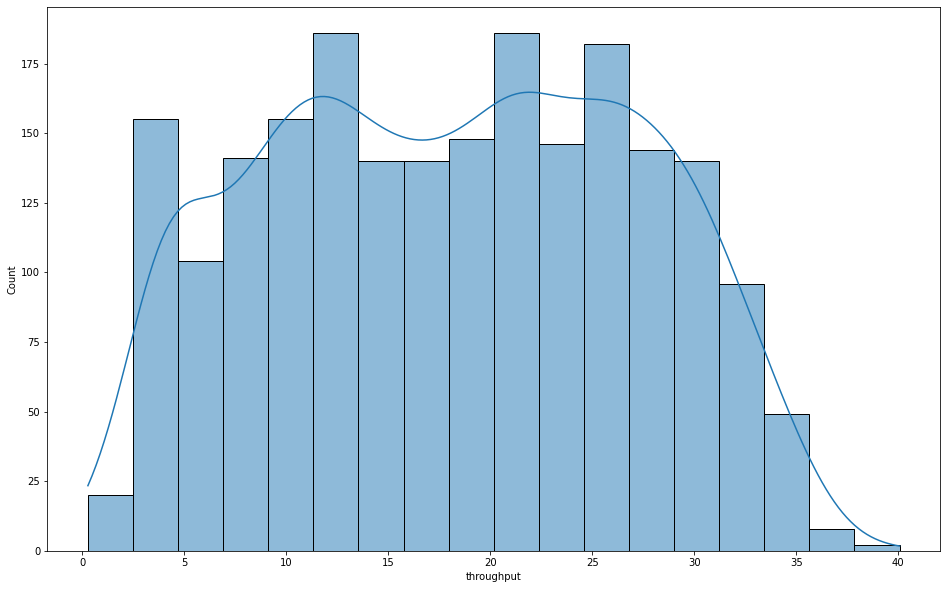

In [33]:
plt.figure(figsize=(16,10))
sns.histplot(data=df, x='throughput',kde=True);
# note that the distribution is not normal (it resembles a uniform distribution, which is a plaussible assumption for a communication model). Mass of the curve is shifted to the left. 

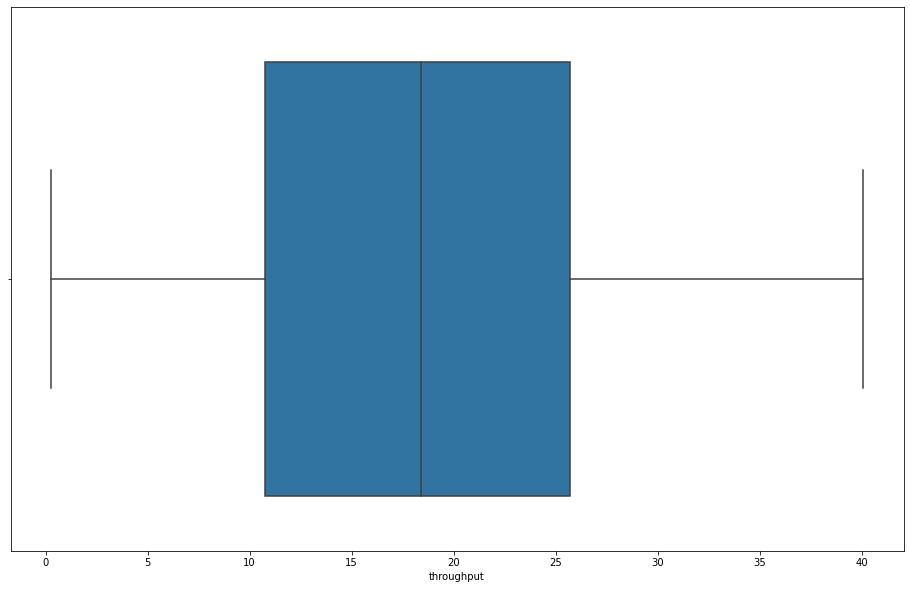

In [34]:
plt.figure(figsize=(16,10))
sns.boxplot(data=df, x='throughput');

# note some outliers by the IQR method 

# Explore Correlation Heatmap
---

## Initiate Correlation Heatmap

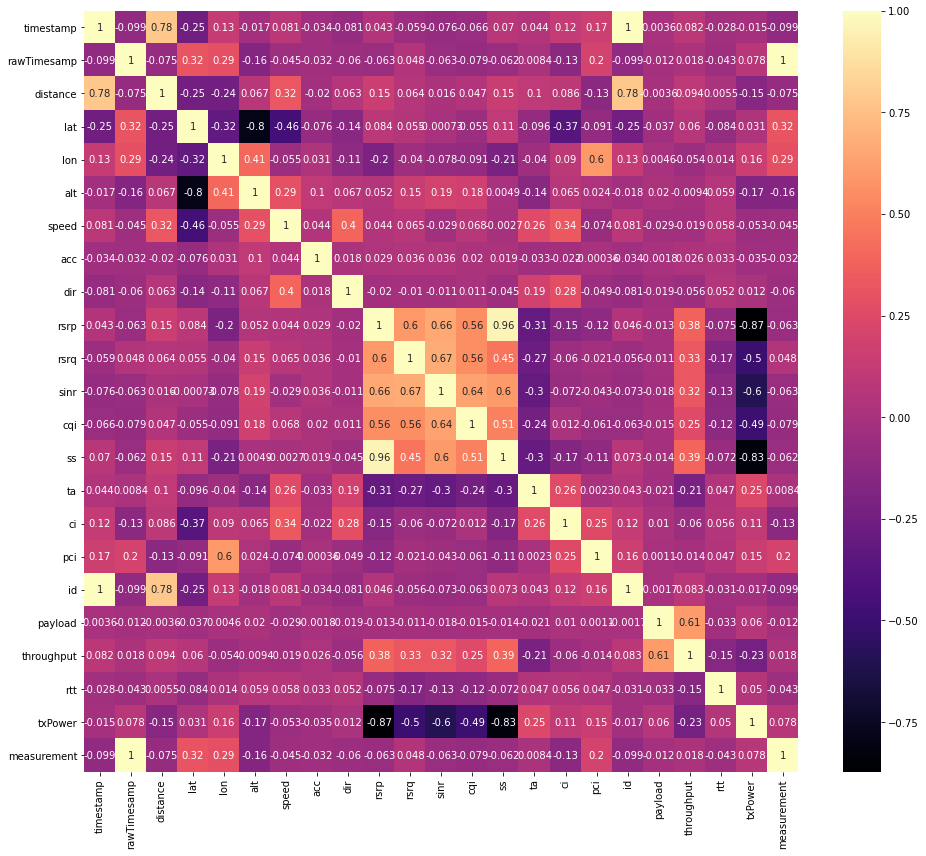

In [35]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),cmap='magma',annot=True);

**Heatmap Finding**

**High Positive Correlation**
- id and timestamp
- measuremet and rawTimesamp
- rsrp and ss (signal strength) 

**Positive Correlation**
- pci and lon

**Negative Correlation**
- speed and lat

**High Negative Correlation**
- alt and lat

**Label**

Throughput shows non-zero correlations with features -> some signal will be picked by the model / no zero importance features

**Heatmap Finding Conclusion**

- Drop **id** and **measurement**: (a) both enconded in other features (b) irrelevant for our predictions (watch out for systematic errors in the experiment phase!) 

- For the reason delineated in (b) we also drop **pci** (physical cell id) (watch out for systematic errors in the experiment phase!) 

- Drop **ss**: calculated based off rsrp / linear transformation of rsrp -> will lead to decreased generalization performance of ML models

## Drop Features based on Heatmap Finding

In [36]:
df = df.drop('id',axis=1)
df = df.drop('measurement', axis=1)
df = df.drop('pci',axis=1)
df = df.drop('ss',axis=1)

# alt and lat are highly correlated! 

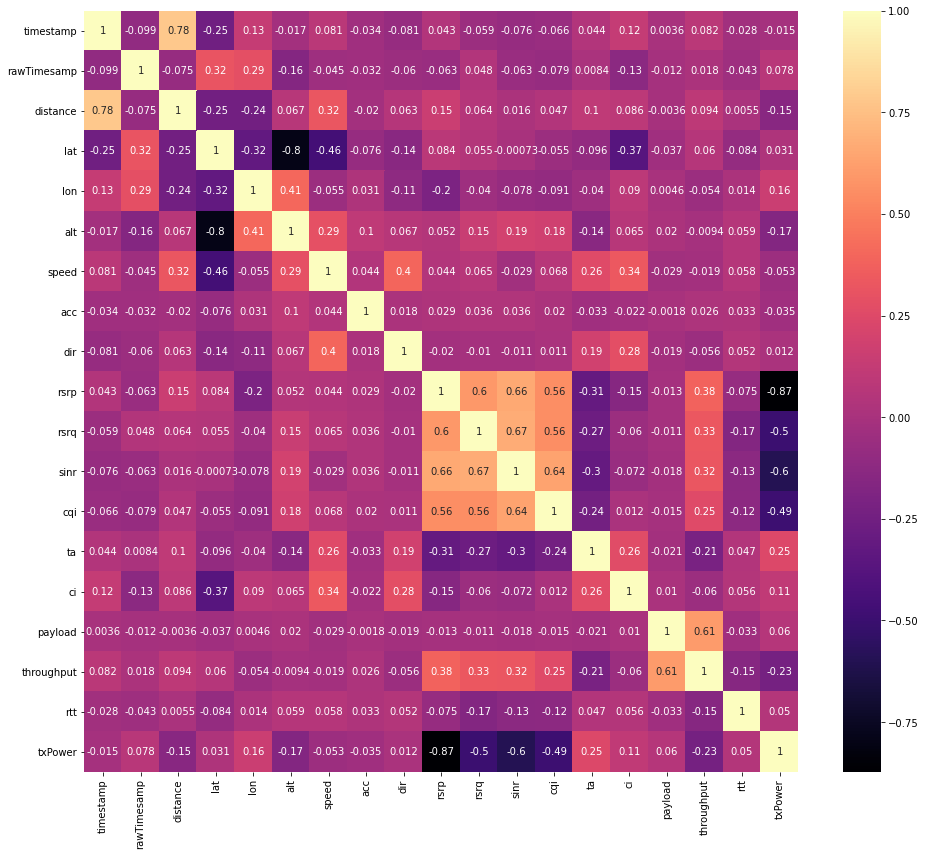

In [37]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),cmap='magma',annot=True);

# Check for Missing Data
---

In [38]:
def percent_missing(df): 
    percent_nan = df.isnull().sum() / len(df) * 100
    percent_nan = percent_nan[percent_nan>0].sort_values()
    
    return percent_nan

In [39]:
percent_missing(df).sum()
# no misiing data

0.0

In [40]:
# Plot percentage of missing data as bar graph (no missing data in this case)

# percent_nan = percent_missing(df)
# 
# plt.figure(figsize=(10,8))
# sns.barplot(x=percent_nan.index,y=percent_nan)
# plt.xticks(rotation=90);

# Further Feature Exploration and Selection 
---

## Datetime

In [41]:
df_raw.columns

Index(['timestamp', 'rawTimesamp', 'distance', 'lat', 'lon', 'alt', 'speed',
       'acc', 'dir', 'connected', 'rsrp', 'rsrq', 'sinr', 'cqi', 'ss', 'ta',
       'ci', 'pci', 'id', 'payload', 'throughput', 'rtt', 'txPower',
       'measurement', 'location'],
      dtype='object')

### timestamp Feature

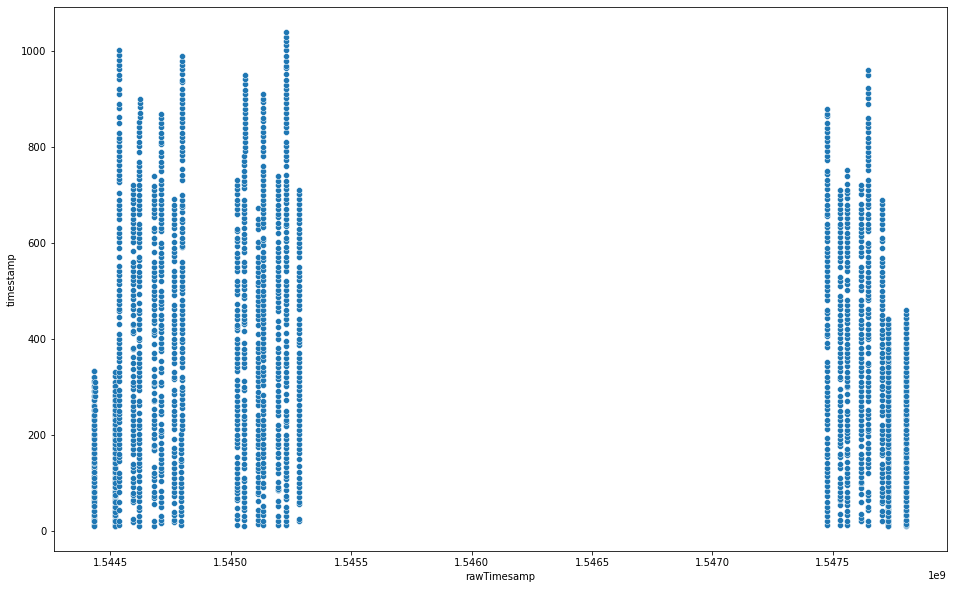

In [42]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_raw, x='rawTimesamp',y='timestamp');
# timestamp seems to be an arbitrary value assigned on the datapoint depending on the particular experiment (measurement). 

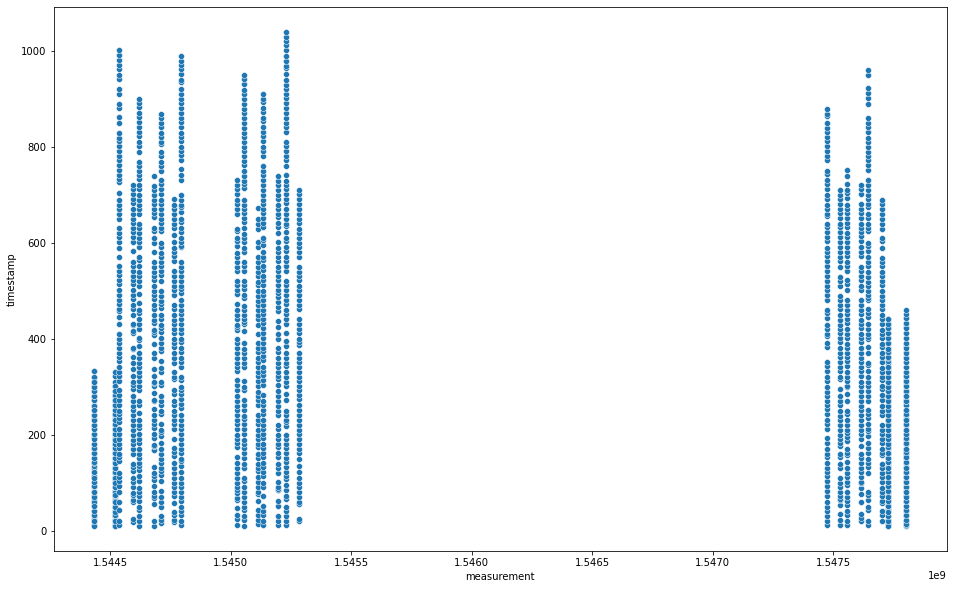

In [43]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_raw, x='measurement',y='timestamp');

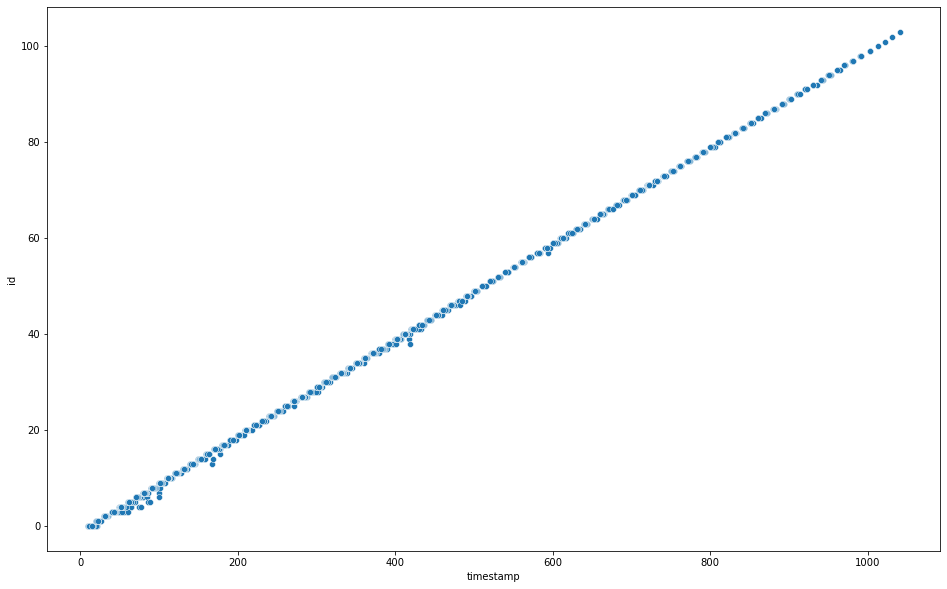

In [44]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df_raw, y='id',x='timestamp');

# note also the timestamp encondes id / higly correlated to id (as noted in the heatmap). We drop timestamp for the following reasons: (a) our predictions should be independent of vehicle / measurement id, (b) rawTimesamp functions as a datetime object for the data frame, and (c) we don't have enough context to interpret id

In [45]:
df = df.drop('timestamp', axis=1)

In [46]:
# we also rename rawTimesamp to better describe the feature
df = df.rename(columns={'rawTimesamp':'unix_time'})

In [47]:
# we rename location to better describe the feature
df = df.rename(columns={'location':'region'})

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix_time   2142 non-null   int64  
 1   distance    2142 non-null   float64
 2   lat         2142 non-null   float64
 3   lon         2142 non-null   float64
 4   alt         2142 non-null   float64
 5   speed       2142 non-null   float64
 6   acc         2142 non-null   float64
 7   dir         2142 non-null   float64
 8   rsrp        2142 non-null   int64  
 9   rsrq        2142 non-null   int64  
 10  sinr        2142 non-null   int64  
 11  cqi         2142 non-null   int64  
 12  ta          2142 non-null   int64  
 13  ci          2142 non-null   int64  
 14  payload     2142 non-null   float64
 15  throughput  2142 non-null   float64
 16  rtt         2142 non-null   int64  
 17  txPower     2142 non-null   float64
 18  region      2142 non-null   object 
dtypes: float64(10), int64(8), o

**Features**
1. unix time
2. distance
3. location
    - latitude
    - longitude
    - altitude
4. mobility / motion
    - speed
    - acceleration
    - direction
5. LTE performance
    - rsrp
    - rsrq
    - sinr
    - cqi (categorical?)
    - ta (categorical?)
6. ci (categorical!)
7. payload
8. rtt
9. location -> region (categorical!)

### unix_time Feature

We break down Unix time into more useful (categorical) features. 

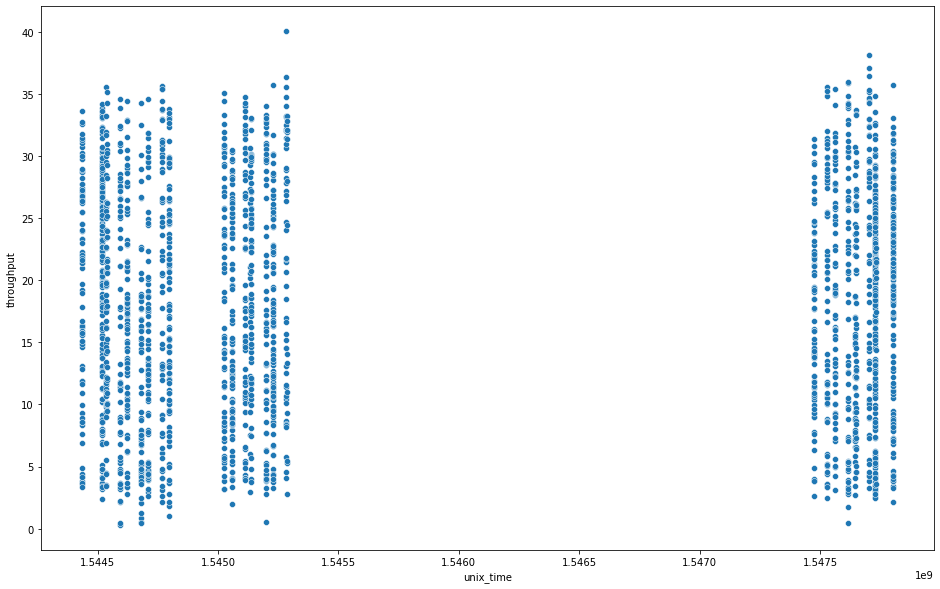

In [49]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df, x='unix_time',y='throughput');

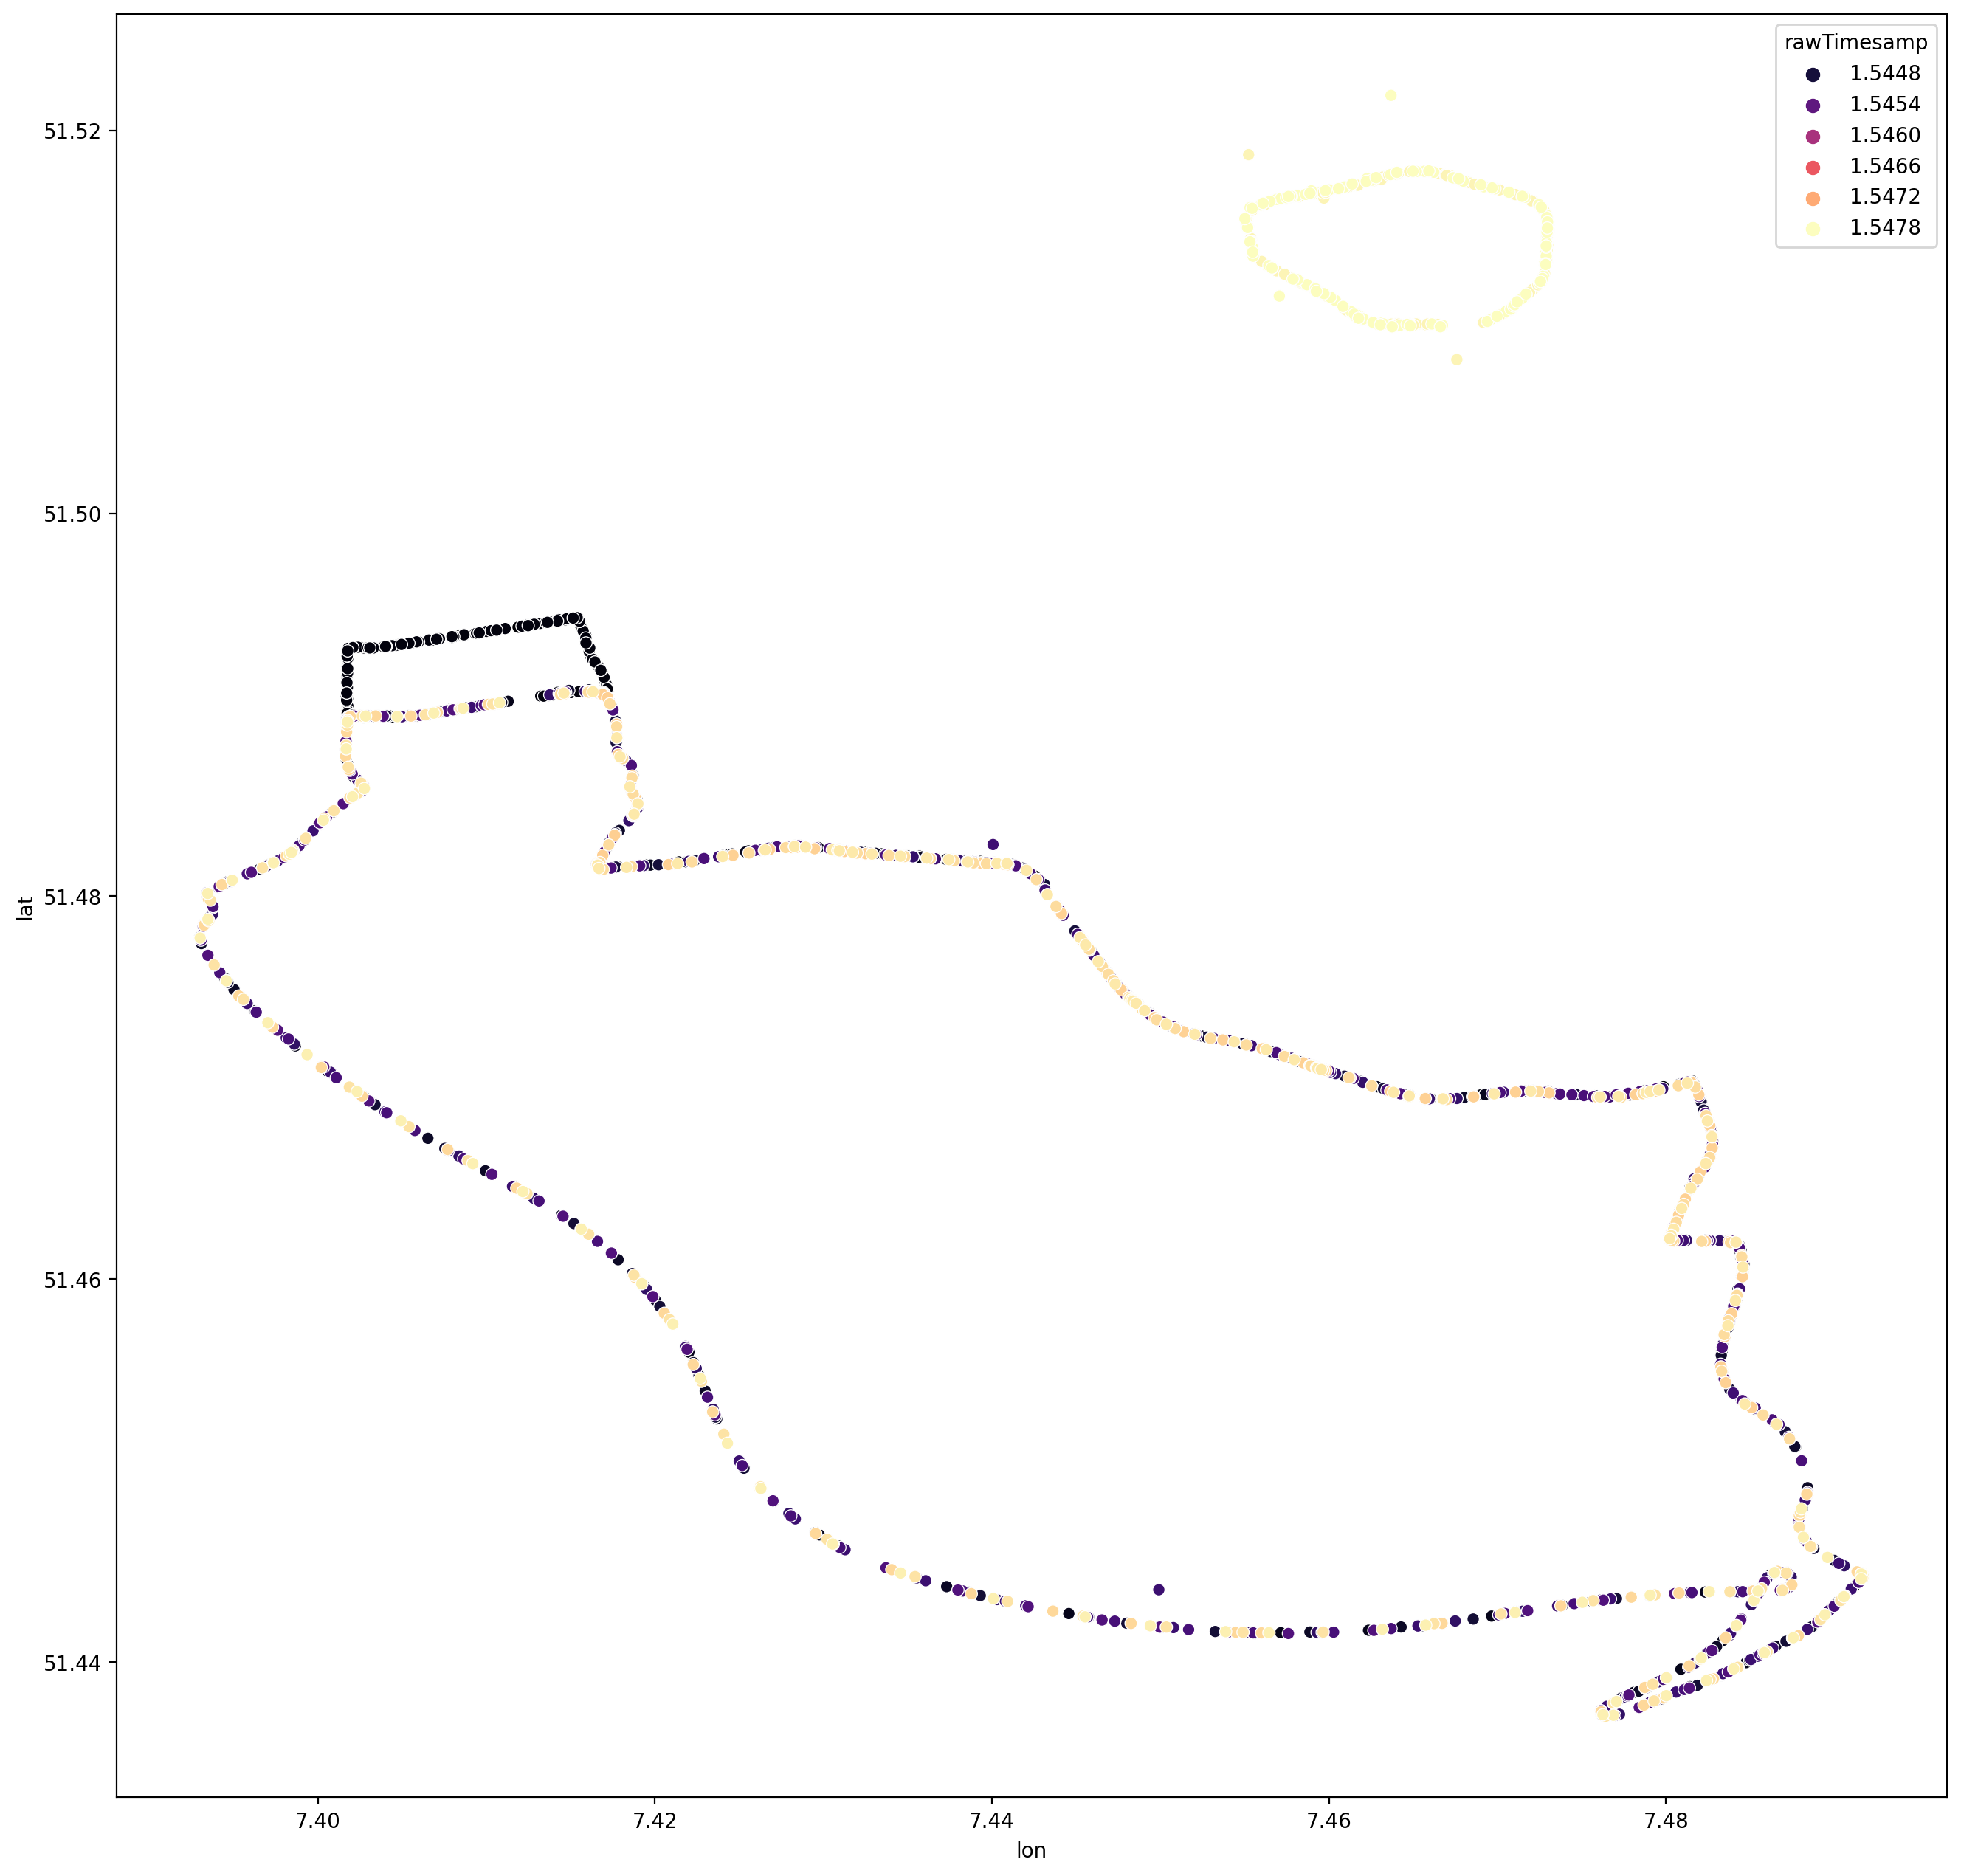

In [50]:
plt.figure(figsize=(16,16),dpi=200)
sns.scatterplot(data=df_raw, x='lon',y='lat',hue='rawTimesamp',palette='magma');

In [51]:
datetime_series = df['unix_time'].apply(lambda unix_time : datetime.fromtimestamp(unix_time))

In [52]:
datetime_series

0      2018-12-10 10:08:58
1      2018-12-10 10:09:08
2      2018-12-10 10:09:19
3      2018-12-10 10:09:42
4      2018-12-10 10:09:51
               ...        
2137   2019-01-18 10:22:11
2138   2019-01-18 10:22:22
2139   2019-01-18 10:22:31
2140   2019-01-18 10:22:40
2141   2019-01-18 10:22:49
Name: unix_time, Length: 2142, dtype: datetime64[ns]

In [53]:
datetime_series.apply(lambda dt : dt.year).unique()
# not enough data -> disregard

array([2018, 2019])

In [54]:
datetime_series.apply(lambda dt : dt.month).unique()
# not enough data -> disregard

array([12,  1])

In [55]:
datetime_series.apply(lambda dt : dt.hour).unique()
# might be interesting to engineer the features morning and afternoon -> dive deeper

array([10,  9,  6, 14, 15, 12, 13])

In [56]:
hour_arr = datetime_series.apply(lambda dt : dt.hour)

In [57]:
hour_df = pd.DataFrame(hour_arr)

In [58]:
hour_df = hour_df.rename({'unix_time':'hour'},axis=1)

In [59]:
hour_df.value_counts()
# distributed fairly evenly -> make categories morning (5 < t_0 < 11) and afternoon (11 < t_0 < 16), i.e. a binary categorical feature

hour
6       650
14      508
10      316
13      293
15      263
9       110
12        2
dtype: int64

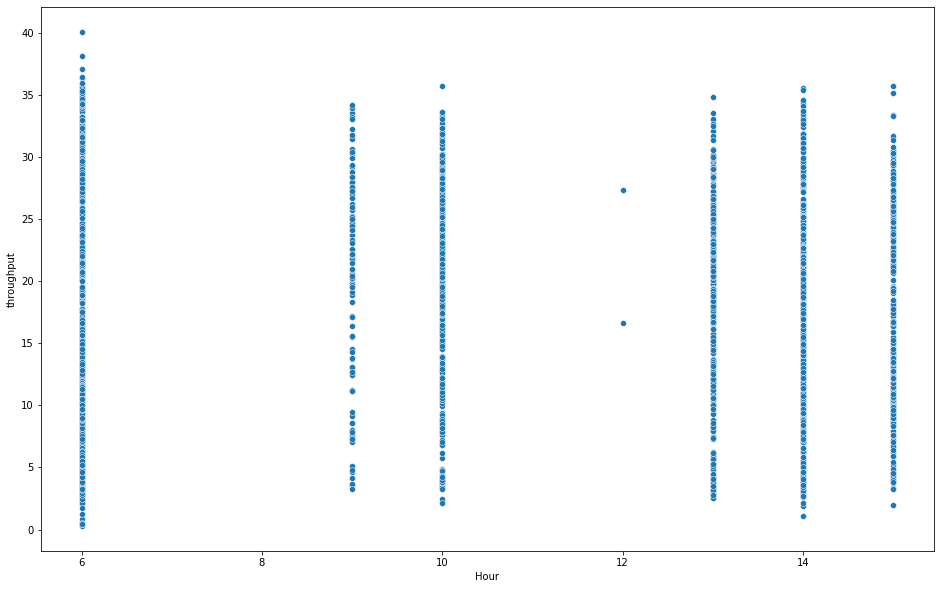

In [60]:
plt.figure(figsize=(16,10))
ax = sns.scatterplot(x=hour_arr,y=df['throughput'])
ax.set_xlabel('Hour');

In [61]:
# Originally we wanted to create categories based on different hour intervalls. This idea was scrapped. 

# def time_of_day(h): 
#     if h < 9: 
#         return 'early morning'
#     elif 9 <= h < 12: 
#         return 'morning'
#     elif 12 <= h < 14: 
#         return 'noon'
#     else: 
#         return 'evening'

In [62]:
# hour_df['hour'] = hour_df['hour'].apply(time_of_day)

In [63]:
# hour_df = hour_df.rename({'hour':'time'},axis=1)

In [64]:
# hour_df.value_counts()

In [65]:
# plt.figure(figsize=(16,10))
# ax = sns.scatterplot(x=hour_df['time'],y=df['throughput'])
# ax.set_xlabel('Time');

---

In [66]:
datetime_series.apply(lambda dt : dt.day_name()).unique()
# all days of the week -> dive deeper; we enconde the weekdays as integers

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype=object)

In [67]:
weekday_arr = datetime_series.apply(lambda dt : dt.day_name())

In [68]:
weekday_df = pd.DataFrame(weekday_arr)

In [69]:
weekday_df = weekday_df.rename({'unix_time':'weekday'},axis=1)

In [70]:
weekday_df.value_counts()
# make categorical feature weekday

weekday  
Tuesday      559
Thursday     492
Wednesday    463
Monday       325
Friday       303
dtype: int64

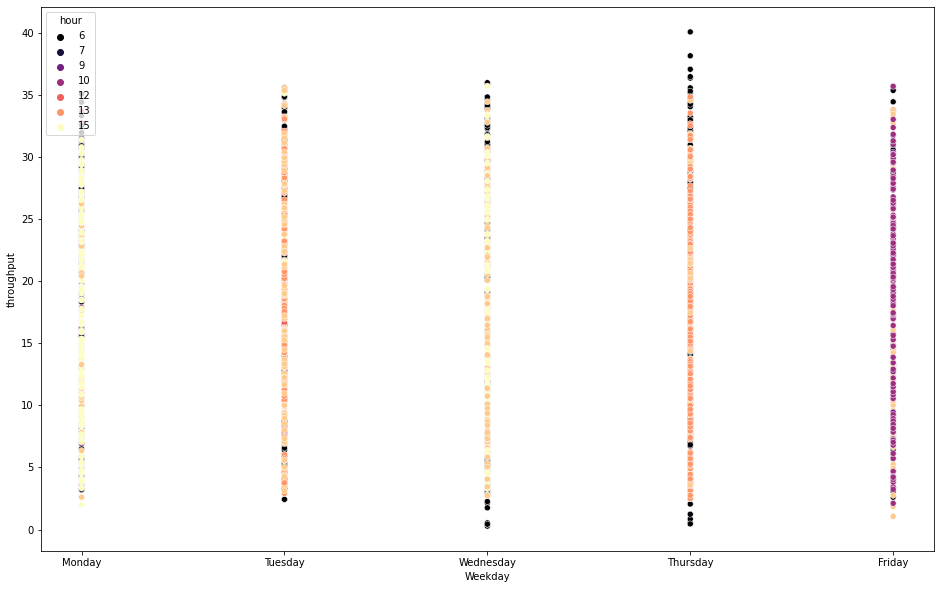

In [71]:
plt.figure(figsize=(16,10))
ax = sns.scatterplot(x=weekday_arr,y=df['throughput'],hue=hour_df['hour'],palette='magma')
ax.set_xlabel('Weekday');
# note that on Friday we mostly find data in the morning hours, on Monday and Wednesday mostly in the evening and on Tuesday and Thrusday around midday -> suggestion for experiment phase: take data throughout the day for all days

In [72]:
# add new features to df and drop unix_time: 
df['hour'] = hour_df['hour']
df['weekday'] = weekday_df['weekday']
df = df.drop('unix_time',axis=1)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   distance    2142 non-null   float64
 1   lat         2142 non-null   float64
 2   lon         2142 non-null   float64
 3   alt         2142 non-null   float64
 4   speed       2142 non-null   float64
 5   acc         2142 non-null   float64
 6   dir         2142 non-null   float64
 7   rsrp        2142 non-null   int64  
 8   rsrq        2142 non-null   int64  
 9   sinr        2142 non-null   int64  
 10  cqi         2142 non-null   int64  
 11  ta          2142 non-null   int64  
 12  ci          2142 non-null   int64  
 13  payload     2142 non-null   float64
 14  throughput  2142 non-null   float64
 15  rtt         2142 non-null   int64  
 16  txPower     2142 non-null   float64
 17  region      2142 non-null   object 
 18  hour        2142 non-null   int64  
 19  weekday     2142 non-null  

## Distance

In [74]:
df['distance'].describe()

count     2142.000000
mean      4282.101695
std       3766.633882
min         79.870000
25%       1378.810000
50%       2836.010000
75%       6444.035000
max      14125.340000
Name: distance, dtype: float64

## Mobility Context

### Position: Latitude, Longitude, and Altitude / Elevation

Note the small scale of the values -> normalization / standardization necessary!

In [75]:
df[['lat','lon','alt']].describe().transpose().drop('count',axis=1)
# standardize features!  

,mean,std,min,25%,50%,75%,max
lat,51.478517,0.022679,51.437179,51.462611,51.481650,51.490657,51.521823
lon,7.445505,0.030740,7.392997,7.416640,7.450149,7.472981,7.491727
alt,177.289463,41.983027,118.170000,151.917500,163.770000,182.185000,297.160000


### Motion: Speed, Acceleration, and Direction

The ML Paper mentions trajectory of the vehicle as well (engineered featured; see ML Paper). The feature direction seems to be encoded in the feature trajectory in the paper. The feature acceleration is not mentioned in the paper. We explore this feature. 

In [76]:
df[['speed','acc','dir']].describe().transpose().drop('count',axis=1)
# stardardize features!

,mean,std,min,25%,50%,75%,max
speed,12.336036,8.950635,0.00,7.1525,12.540,15.0950,39.34
acc,0.020556,0.923075,-6.03,0.0000,0.000,0.0000,13.04
dir,165.689220,93.093156,0.04,91.3400,151.375,251.1425,359.95


### Cell ID

There is not enough context provided in the feature description. We assume CI represents Cell Id. In the Paper Cell Id is assigned to the Mobility Context. We assume CI is a categorical feature. Read more [here](https://en.wikipedia.org/wiki/GSM_Cell_ID). 

## Network Context / Channel Performance: RSRP, RSRQ, SINR, CQI, TA

The studies agree that passively measurable network quality indicators such as Reference Signal Received Power (RSRP), Reference Signal Received Quality (RSRQ), Signal- to-interference-plus-noise Ratio (SINR), and Channel Quality Indicator (CQI) provide meaningful information, which can be leveraged to estimate the resulting data rate based on machine learning methods even in challenging environments. We also consider Timing Advance (TA). 

In [77]:
df[['rsrp', 'rsrq','sinr', 'cqi', 'ta']].describe().transpose().drop('count',axis=1)

,mean,std,min,25%,50%,75%,max
rsrp,-88.361345,9.350568,-113.0,-95.0,-89.0,-83.0,-56.0
rsrq,-7.440710,2.106458,-19.0,-9.0,-7.0,-6.0,-4.0
sinr,13.419701,9.827320,-15.0,6.0,12.0,21.0,40.0
cqi,9.950980,3.335922,1.0,7.0,10.0,12.0,15.0
ta,7.029879,6.213697,0.0,3.0,6.0,9.0,94.0


## Application Context: Payload

In [78]:
df['payload'].describe()

count    2142.000000
mean        4.571242
std         3.254285
min         0.100000
25%         2.000000
50%         4.000000
75%         8.000000
max        10.000000
Name: payload, dtype: float64

## Additional Features not found in the Paper

The Round Trip Time (RTT) and the Location (Region) are not mentioned as Features in the Paper but we'll consider them for our analyis. We explore RTT in this Section. 

In [79]:
df['rtt'].describe()
# extreme outliers in the data -> consider droping some datapoints

count    2142.000000
mean       59.936508
std       164.189976
min        29.000000
25%        38.000000
50%        42.000000
75%        50.000000
max      5322.000000
Name: rtt, dtype: float64

In [80]:
df.to_csv('./data/ul-nfe-ns-nd.csv', index=False)
# pfe = post feature engineering
# ns = not scaled
# nd = no dummy variables

# Encoding Categorical Features

We create dummy variables for the following features: 
- region 
- weekday
- ci (we don't have enough domain knowledge to check if this is a correct assumption)

The following ordinal features remain unchanged (not enough domain knowledge, but by reading the articles we can infer there is an order to the variable values).
- [CQI](https://ytd2525.wordpress.com/2014/02/02/cqi-channel-quality-indicator/)

In [81]:
cat_features = ['ci','region','weekday']
cat_df = df[cat_features].copy()

In [82]:
# convert CI int -> object
cat_df['ci'] = cat_df['ci'].apply(str)

In [83]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ci       2142 non-null   object
 1   region   2142 non-null   object
 2   weekday  2142 non-null   object
dtypes: object(3)
memory usage: 50.3+ KB


In [84]:
non_cat_df = df.drop(cat_features, axis=1)

In [85]:
non_cat_df.head()

,distance,lat,lon,alt,speed,acc,dir,rsrp,rsrq,sinr,cqi,ta,payload,throughput,rtt,txPower,hour
0,113.75,51.490592,7.414306,156.39,12.21,0.50,77.59,-85,-5,22,10,7,4.0,24.5211,35,12.30470,10
1,231.40,51.490717,7.415835,152.53,11.17,0.00,87.24,-84,-6,11,13,4,2.0,14.8561,51,10.01560,10
2,323.73,51.490634,7.417138,154.23,6.44,0.00,48.55,-82,-6,21,15,4,4.0,16.2684,57,4.34375,10
3,537.34,51.492531,7.416222,154.41,12.33,0.02,336.68,-90,-6,16,9,4,8.0,14.5886,60,17.31250,10
4,650.07,51.493484,7.415836,153.05,11.69,-0.18,348.09,-101,-10,13,15,4,6.0,13.1255,57,19.93750,10


In [86]:
cat_df_d = pd.get_dummies(cat_df, drop_first=True)
# d = dummy variables, we drop the first column of each set of dummy variables

In [87]:
cat_df_d

,ci_26378497,ci_26378498,ci_26378754,ci_26378755,ci_26379013,ci_26385408,ci_26385409,ci_26385410,ci_26796290,ci_26796291,...,ci_33527559,ci_33527561,ci_33837570,region_highway,region_suburban,region_urban,weekday_Monday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [88]:
pfe_df = pd.concat([non_cat_df, cat_df_d],axis=1)
# pfe = post feature engineering

In [89]:
pfe_df.head()

,distance,lat,lon,alt,speed,acc,dir,rsrp,rsrq,sinr,...,ci_33527559,ci_33527561,ci_33837570,region_highway,region_suburban,region_urban,weekday_Monday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,113.75,51.490592,7.414306,156.39,12.21,0.50,77.59,-85,-5,22,...,0,0,0,0,0,0,1,0,0,0
1,231.40,51.490717,7.415835,152.53,11.17,0.00,87.24,-84,-6,11,...,0,0,0,0,0,0,1,0,0,0
2,323.73,51.490634,7.417138,154.23,6.44,0.00,48.55,-82,-6,21,...,0,0,0,0,0,0,1,0,0,0
3,537.34,51.492531,7.416222,154.41,12.33,0.02,336.68,-90,-6,16,...,0,0,0,0,0,0,1,0,0,0
4,650.07,51.493484,7.415836,153.05,11.69,-0.18,348.09,-101,-10,13,...,0,0,0,0,0,0,1,0,0,0


In [90]:
pfe_df.corr()['throughput'].sort_values()

txPower       -0.230067
ta            -0.209764
ci_28368386   -0.157595
rtt           -0.148920
ci_28371201   -0.112192
                 ...   
sinr           0.323090
rsrq           0.333265
rsrp           0.379373
payload        0.607698
throughput     1.000000
Name: throughput, Length: 87, dtype: float64

In [91]:
pfe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 87 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance           2142 non-null   float64
 1   lat                2142 non-null   float64
 2   lon                2142 non-null   float64
 3   alt                2142 non-null   float64
 4   speed              2142 non-null   float64
 5   acc                2142 non-null   float64
 6   dir                2142 non-null   float64
 7   rsrp               2142 non-null   int64  
 8   rsrq               2142 non-null   int64  
 9   sinr               2142 non-null   int64  
 10  cqi                2142 non-null   int64  
 11  ta                 2142 non-null   int64  
 12  payload            2142 non-null   float64
 13  throughput         2142 non-null   float64
 14  rtt                2142 non-null   int64  
 15  txPower            2142 non-null   float64
 16  hour               2142 

In [92]:
# originally we were going to move the label to the end of the data frame but we decided against it
# cols = list(df.columns)
# cols.pop(cols.index('throughput'))
# 
# df = df[cols+['throughput']]

In [93]:
pfe_df.head()

,distance,lat,lon,alt,speed,acc,dir,rsrp,rsrq,sinr,...,ci_33527559,ci_33527561,ci_33837570,region_highway,region_suburban,region_urban,weekday_Monday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,113.75,51.490592,7.414306,156.39,12.21,0.50,77.59,-85,-5,22,...,0,0,0,0,0,0,1,0,0,0
1,231.40,51.490717,7.415835,152.53,11.17,0.00,87.24,-84,-6,11,...,0,0,0,0,0,0,1,0,0,0
2,323.73,51.490634,7.417138,154.23,6.44,0.00,48.55,-82,-6,21,...,0,0,0,0,0,0,1,0,0,0
3,537.34,51.492531,7.416222,154.41,12.33,0.02,336.68,-90,-6,16,...,0,0,0,0,0,0,1,0,0,0
4,650.07,51.493484,7.415836,153.05,11.69,-0.18,348.09,-101,-10,13,...,0,0,0,0,0,0,1,0,0,0


In [94]:
pfe_df.shape

(2142, 87)

# Export Final DataFrame
Note that we didn't encode categorical Features! 

In [95]:
pfe_df.to_csv('./data/ul-nfe-ns.csv', index=False)
# pfe = post feature engineering
# ns = not scaled

In [96]:
f'We dropped {(1-(len(pfe_df)/len(df_raw)))*100:.2f}% of the data points in this Section'

'We dropped 0.00% of the data points in this Section'

DONE!